# 1. Instalação das Bibliotecas

In [1]:
# %pip install -U pandas
# %pip install -U numpy
# %pip install -U matplotlib
# %pip install -U seaborn
# %pip install -U openpyxl
# %pip install -U scikit-learn
# %pip install -U plotly
# %pip install -U statsmodels
# %pip install -U nbformat

# 2. Importando as Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import openpyxl
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import nbformat


# 3. Parametros universais

In [3]:
parametro_random_state = 42

# 3. Importando os dados

Os datasets a serem carregados neste projeto são referentes à análise histopatológica de punção aspirativa de agulha fina (PAAF) de massas tumorais coletadas de tecido mamário e tecido prostático.<br>
Após coleta e tratamento do material biológico, os mesmos foram preparados para análise histopatológica e avaliados em microscópio confocal com software acoplado para auxílio na análise das imagens.

## 3.1. Câncer de mama

In [4]:
# Primeiro dataset (link)
bc_url = r"https://raw.githubusercontent.com/MYoussef885/Breast_Cancer_Classification_using_NN/refs/heads/main/data_bc.csv"
breast_cancer_df1 = pd.read_csv(bc_url)

In [5]:
# Segundo dataset (CSV)
breast_cancer_df2 = pd.read_csv(r"C:\Users\Eduardo Socca\OneDrive\Cursos online\MBA Data Science e Analytics - USP Esalq\TCC\tcc_breast_cancer\venv_tcc\datasets\cancer_data.csv")

## 3.2. Câncer de Próstata

In [6]:
# Primeiro dataset (url)
pc_url = r"https://raw.githubusercontent.com/duttashi/learnr/refs/heads/master/data/misc/Prostate_Cancer.csv"
prostate_cancer_df1 = pd.read_csv(pc_url)

In [7]:
# Segundo dataset (CSV)
prostate_cancer_df2 = pd.read_csv(r"C:\Users\Eduardo Socca\OneDrive\Cursos online\MBA Data Science e Analytics - USP Esalq\TCC\tcc_breast_cancer\venv_tcc\datasets\prostate_data_dataset.csv")

# 4. Análise exploratória dos dados

## 4.1. Primeiro Dataframe (breast_cancer_df1)

In [8]:
# 1. Fazendo uma cópia do df original
bc_df1 = breast_cancer_df1.copy()

In [9]:
# 2. Adicionando uma coluna com o tecido de origem da amostra
bc_df1['tissue'] = "Mammary tissue"

In [10]:
# 3. compeendendo o formato do dataframe
bc_df1.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst          tissue  
0                  0.11890  Mammary tissue  
1                  0.08902  Mammary tissue  
2                  0.08758  Mammary tissue  
3                  0.17300  Mammary tissue  
4                  0.07678  Mammary tissue  

[5 rows x 33 columns]

In [11]:
bc_df1.shape# ververificandvvvvvvaa

(569, 33)

In [12]:
bc_df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'tissue'],
      dtype='object')

In [ ]:
bc_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Como é possivel verificar, não há valores nulo no dataframe acima.<br>
Desta forma, a limpeza de dados nulos não se faz necessária.

In [ ]:
# Verificando a presença de dados duplicados
bc_df1[bc_df1.duplicated(['id'], keep = False)]


Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, tissue]
Index: []

[0 rows x 33 columns]

Como é possível verificar, não há IDs duplicados

## 4.2. Segundo Dataframe (breast_cancer-df2)

In [15]:
# 1. Fazendo uma cópia do df original
bc_df2 = breast_cancer_df2.copy()

In [16]:
# 2. Adicionando uma coluna com o tecido de origem da amostra
bc_df2['tissue'] = "Mammary tissue"

In [17]:
# 3. compeendendo o formato do dataframe
bc_df2.head()

radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  \
0    17.663889     24.373028      101.416419   900.736303         0.118745   
1    18.495713     16.849785       95.214344  1802.804701         0.076270   
2    13.670708     20.744454      122.494028  1102.924350         0.131681   
3    14.883033     25.348880       78.639046   599.313206         0.118639   
4    13.856493     17.106242       69.960736   500.512169         0.088018   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.118216        0.230131             0.049139       0.178416   
1          0.115014        0.069425             0.085209       0.190750   
2          0.080523        0.218740             0.069166       0.186455   
3          0.127509        0.089714             0.000000       0.142790   
4          0.068543        0.031146             0.019156       0.193891   

   fractal_dimension_mean  ...  concavity_worst  concave points_worst  \
0                0.061777  ...         0.243875              0.141979   
1                0.059145  ...         0.582906              0.204758   
2                0.054309  ...         0.654366              0.249836   
3                0.070940  ...         0.185848              0.090172   
4                0.062520  ...         0.076878              0.113494   

   symmetry_worst  fractal_dimension_worst  \
0        0.437508                 0.085149   
1        0.430243                 0.112520   
2        0.331515                 0.109775   
3        0.208906                 0.068242   
4        0.264636                 0.067202   

                                     id                name  age  gender  \
0  6e686fc9-6bf0-47f7-b0a4-f594ac1ba631       Rebecca Henry   54  Female   
1  0762f3ba-1a35-46f6-8178-7262e4b03c35         Amber Chase   48  Female   
2  3cb8492d-529a-45b0-8280-d601f60619d9  Mrs. Felicia Ramos   44  Female   
3  3344e34c-e57d-45ef-bc22-74b3f348bf5a    Angelica Edwards   34  Female   
4  35699820-e233-42f0-9f1c-57be9685b35f     Angela Anderson   57  Female   

   diagnosis          tissue  
0          M  Mammary tissue  
1          M  Mammary tissue  
2          M  Mammary tissue  
3          B  Mammary tissue  
4          B  Mammary tissue  

[5 rows x 36 columns]

In [18]:
 # Verificando o formato do dataframe 
bc_df2.shape

(4983, 36)

In [19]:
bc_df2.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'id', 'name', 'age',
       'gender', 'diagnosis', 'tissue'],
      dtype='object')

In [20]:
bc_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              4983 non-null   float64
 1   texture_mean             4983 non-null   float64
 2   perimeter_mean           4983 non-null   float64
 3   area_mean                4983 non-null   float64
 4   smoothness_mean          4983 non-null   float64
 5   compactness_mean         4983 non-null   float64
 6   concavity_mean           4983 non-null   float64
 7   concave points_mean      4983 non-null   float64
 8   symmetry_mean            4983 non-null   float64
 9   fractal_dimension_mean   4983 non-null   float64
 10  radius_se                4983 non-null   float64
 11  texture_se               4983 non-null   float64
 12  perimeter_se             4983 non-null   float64
 13  area_se                  4983 non-null   float64
 14  smoothness_se           

Como é possivel verificar, não há valores nulo no dataframe acima.<br>
Desta forma, a limpeza de dados nulos não se faz necessária.

In [21]:
# Verificando a presença de dados duplicados
bc_df2[bc_df2.duplicated(['id'], keep = False)]


Empty DataFrame
Columns: [radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, id, name, age, gender, diagnosis, tissue]
Index: []

[0 rows x 36 columns]

Como é possível verificar, não há IDs duplicados

## 4.3. Terceiro Dataframe (prostate_cancer_df1)

In [22]:
# 1. Fazendo uma cópia do df original
pc_df1 = prostate_cancer_df1.copy()

In [23]:
# 2. Adicionando uma coluna com o tecido de origem da amostra
pc_df1['tissue'] = "Prostatic tissue"

In [24]:
# 3. compeendendo o formato do dataframe
pc_df1.head()

id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0   1                M      23       12        151   954       0.143   
1   2                B       9       13        133  1326       0.143   
2   3                M      21       27        130  1203       0.125   
3   4                M      14       16         78   386       0.070   
4   5                M       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension            tissue  
0        0.278     0.242              0.079  Prostatic tissue  
1        0.079     0.181              0.057  Prostatic tissue  
2        0.160     0.207              0.060  Prostatic tissue  
3        0.284     0.260              0.097  Prostatic tissue  
4        0.133     0.181              0.059  Prostatic tissue

In [25]:
# Verificando o formato do Dataframe
pc_df1.shape

(100, 11)

In [26]:
pc_df1.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension', 'tissue'],
      dtype='object')

In [27]:
pc_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
 10  tissue             100 non-null    object 
dtypes: float64(4), int64(5), object(2)
memory usage: 8.7+ KB


Como é possivel verificar, não há valores nulo no dataframe acima.<br>
Desta forma, a limpeza de dados nulos não se faz necessária.

In [28]:
# Verificando a presença de dados duplicados
pc_df1[pc_df1.duplicated(['id'], keep = False)]


Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, compactness, symmetry, fractal_dimension, tissue]
Index: []

Como é possível verificar, não há IDs duplicados

## 4.4. Quarto Dataframe (prostate_cancer_df2)

In [29]:
# 1. Fazendo uma cópia do df original
pc_df2 = prostate_cancer_df2.copy()

In [30]:
# 2. Adicionando uma coluna com o tecido de origem da amostra
pc_df2['tissue'] = "Prostatic tissue"

In [31]:
# 3. compeendendo o formato do dataframe
pc_df2.head()

radius    texture  perimeter        area  smoothness  compactness  \
0  24.236212  19.350775  95.201978  849.530359    0.102558     0.054081   
1  23.424906  15.561376  98.303329  652.919911    0.125613     0.087457   
2  16.660974  13.452430  89.632910  463.928594    0.119722     0.156807   
3  18.478596  26.996982  96.993208  664.798153    0.119087     0.170351   
4  23.306278  12.185153  58.763361  398.239804    0.114682     0.102284   

   symmetry  fractal_dimension                                    id  \
0  0.158665           0.055362  f032cf3e-c0e0-4a9b-83bf-c349e026de3c   
1  0.198230           0.066591  26ef5aca-6658-4106-beb2-1b0c6dae8204   
2  0.141016           0.063725  3a27d107-8583-4124-929b-b88f19bb4e86   
3  0.212509           0.061570  1b5e3837-3bd7-4fda-9d4c-6cc07a9a2916   
4  0.176120           0.075777  c8650634-a393-495c-af4f-6a553a064885   

             name  age gender diagnosis_result            tissue  
0     William Lin   40   Male                M  Prostatic tissue  
1  Andrew Bridges   34   Male                B  Prostatic tissue  
2   Joseph Thomas   48   Male                B  Prostatic tissue  
3       Mike Mora   65   Male                M  Prostatic tissue  
4   Colton Barnes   49   Male                B  Prostatic tissue

In [32]:
pc_df2.shape# ververificandvvvvvvaa

(4983, 14)

In [33]:
pc_df2.columns

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'symmetry', 'fractal_dimension', 'id', 'name', 'age', 'gender',
       'diagnosis_result', 'tissue'],
      dtype='object')

In [34]:
pc_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             4983 non-null   float64
 1   texture            4983 non-null   float64
 2   perimeter          4983 non-null   float64
 3   area               4983 non-null   float64
 4   smoothness         4983 non-null   float64
 5   compactness        4983 non-null   float64
 6   symmetry           4983 non-null   float64
 7   fractal_dimension  4983 non-null   float64
 8   id                 4983 non-null   object 
 9   name               4983 non-null   object 
 10  age                4983 non-null   int64  
 11  gender             4983 non-null   object 
 12  diagnosis_result   4983 non-null   object 
 13  tissue             4983 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 545.1+ KB


Como é possivel verificar, não há valores nulo no dataframe acima.<br>
Desta forma, a limpeza de dados nulos não se faz necessária.

In [35]:
# Verificando a presença de dados duplicados
pc_df2[pc_df2.duplicated(['id'], keep = False)]


Empty DataFrame
Columns: [radius, texture, perimeter, area, smoothness, compactness, symmetry, fractal_dimension, id, name, age, gender, diagnosis_result, tissue]
Index: []

Como é possível verificar, não há IDs duplicados

## 5. Concatenando todos os dataframes

Para unificar todos os dataframes, primeiramente será feita uma padronização nas colunas alem do entendimento de quais variáveis são mais relevantes para as próximas etapas.

## 5.1. Concatenando os dataframes de Câncer de Mama

In [36]:
print(bc_df1.columns)
print(bc_df2.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'tissue'],
      dtype='object')
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points

In [37]:
# Primeiro Dataframe
bc_df1 = bc_df1[['tissue', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean'
       ]]

# Segundo Dataframe
bc_df2 = bc_df2[['tissue', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean'
       ]]

In [38]:
breast_cancer = pd.concat([bc_df1,bc_df2], ignore_index=True)

In [39]:
breast_cancer.rename(columns = {
    'diagnosis': 'diagnosis_result', 
    'radius_mean': 'radius', 
    'texture_mean': 'texture', 
    'perimeter_mean': 'perimeter', 
    'area_mean': 'area',
    'smoothness_mean': 'smoothness', 
    'compactness_mean': 'compactness', 
    'symmetry_mean': 'symmetry', 
    'fractal_dimension_mean': 'fractal_dimension'
}, inplace = True)


In [40]:
breast_cancer = breast_cancer[['tissue','diagnosis_result','radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']]

In [41]:
breast_cancer.shape

(5552, 10)

## 5.2. Concatenando os Dataframes de Câncer de Próstata

In [42]:
print(pc_df1.columns)
print(pc_df2.columns)

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension', 'tissue'],
      dtype='object')
Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'symmetry', 'fractal_dimension', 'id', 'name', 'age', 'gender',
       'diagnosis_result', 'tissue'],
      dtype='object')


In [43]:
pc_df1 = pc_df1[['tissue','diagnosis_result','radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']]

pc_df2 = pc_df2[['tissue','diagnosis_result','radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness','symmetry', 'fractal_dimension']]

In [44]:
prostate_cancer = pd.concat([pc_df1,pc_df2], ignore_index=True)

## 5.3. Dataframe Final

In [45]:
cancer_dataframe = pd.concat([breast_cancer, prostate_cancer], ignore_index=True)

cancer = cancer_dataframe.copy()


# 6. Análise multivariada dos dataframes

## 6.1. Mapa de Calor

In [46]:
cancer_corr = cancer[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness','symmetry', 'fractal_dimension'
       ]]

In [47]:
# Configurar o renderer para Jupyter Notebook ou JupyterLab
pio.renderers.default = 'notebook'

# Calculando a matriz de correlação
matriz_correlacao = cancer_corr.corr()

# Criando o mapa de correlação
fig = go.Figure(data = go.Heatmap(
    z = matriz_correlacao.values,
    x = matriz_correlacao.columns,
    y = matriz_correlacao.index[::1 ],
    colorscale='Viridis',          # Escolha do esquema de cores
    zmin=-1, zmax=1
))
# Adicionando título e ajustando o layout
fig.update_layout(
    title='Mapa de Correlação',
    xaxis_nticks=36,
    width=800, height=800,
    xaxis = dict(tickangle= 45, tickfont =  dict(size = 12)),
    yaxis = dict(tickfont = dict(size = 12))
)

# Exibindo o gráfico
fig.show()


## 6.2. Análise de Componentes Principais (PCA)

In [48]:
# Primeiramente vamos reduzis a dimencionalidade, de modo a entender a variabilidade dos dados e identificar padrões

pca = PCA(n_components =5)
componentes = pca.fit_transform(cancer.select_dtypes(include=['float64', 'int64']))
variancia_explicada = pca.explained_variance_ratio_.round(5)
somar_variancias = sum(variancia_explicada)

print(f'Variância explicada:{variancia_explicada}')
print(f'Soma da variância explicada:{somar_variancias}')

Variância explicada:[9.9578e-01 3.8800e-03 1.8000e-04 1.6000e-04 0.0000e+00]
Soma da variância explicada:1.0


O resultado da soma da variância indica que é possível reter praticamente 100% da variabilidade dos dados, indicando que estes 5 componentem capturam quase a totalidade da informação relevante.<br>
Neste caso, a redução da dimensionalidade foi extremamente eficaz, visto que o dataset contem 8 variáveis e o método o reduziu a 3 variáveis significativas

In [49]:
# Verificando quais são os componentes significativos após a redução
loadings = pd.DataFrame(pca.components_.T,
                        columns = [f'PC{i+1}' for i in range(5)],
                        index = cancer.select_dtypes(include=['float64', 'int64']).columns)




## 6.3. Análise de cluster

### 6.3.1. K-means

In [50]:
# Separando as variáveis numéricas e as variáveis categoricas
variaveis_numericas = cancer.select_dtypes(include = ['float64', 'int64']).columns
variaveis_categoricas = cancer.select_dtypes(include = ['object']).columns

In [51]:
# Trabalhando com  as variáveis numéricas para o cluster
dados_numericos = cancer[variaveis_numericas]

In [52]:
# Padronização dos dados
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(dados_numericos)

In [53]:
# Escolhendo o número de clusters
sse = []
K = range(1,11)
for k in K:
    kmeans = KMeans (n_clusters = k, random_state = parametro_random_state)
    kmeans.fit(dados_padronizados)
    sse.append(kmeans.inertia_)

fig = px.line(x = list(K), y=sse, markers=True,labels={'x': 'Número de Clusters (k)', 'y': 'Soma dos erros quadraticos (SSE)'}, title = 'Metodo Elbow para determinação de k')
fig.show()

Analisando o gráfico da metodologia de Elbow, vverifica-se um 'cotovelo' ocorrendo em k=3, o que indica um ponto em que a soma dos erros quadráticos (SSE) começa a diminuuir lentamente. k=4 tambem pode ser utilizado, visto que há uma pequena melhoria.

In [54]:
# Aplicando o K-means com o número escolhido de clueters
kmeans = KMeans(n_clusters = 4, random_state = parametro_random_state)
cancer['Cluster'] = kmeans.fit_predict(dados_padronizados)

In [55]:
# Analisando os clusters juntamente com as variáveis categóricas

print(cancer[['Cluster', 'diagnosis_result', 'tissue' ]].groupby('Cluster').agg(lambda x: x.value_counts().index[0]))

        diagnosis_result            tissue
Cluster                                   
0                      M  Prostatic tissue
1                      B  Prostatic tissue
2                      B    Mammary tissue
3                      M    Mammary tissue


## 6.3. Verificando se a segmentação dos clusters está alinhada com os grupos conhecidos

In [56]:
# Análise de contingência

#Tabela cruzada para verificar a relação entre clusters e tecidos
analise_contingencia_tecidos = pd.crosstab(cancer['Cluster'], cancer['tissue'], margins = True, margins_name = 'Toral')

#Tabela cruzada para verificar a relação entre clusters e diagnósticos
analise_contingencia_diagnosticos = pd.crosstab(cancer['Cluster'], cancer['diagnosis_result'], margins = True, margins_name = 'Toral')

print(analise_contingencia_tecidos)
print(analise_contingencia_diagnosticos)

tissue   Mammary tissue  Prostatic tissue  Toral
Cluster                                         
0                   741              1462   2203
1                   196              1696   1892
2                  2873              1067   3940
3                  1742               858   2600
Toral              5552              5083  10635
diagnosis_result     B     M  Toral
Cluster                            
0                  253  1950   2203
1                 1428   464   1892
2                 3634   306   3940
3                   57  2543   2600
Toral             5372  5263  10635


## 6.4. Aplicando o resultado dos componentes principais (PCA)


In [57]:
# Selecionando as variáveis mais relevantes identificadas atraves do PCA
variaveis_pca = ['area', 'perimeter', 'texture', 'radius', 'compactness']
dados_selecionados = cancer[variaveis_pca]

In [58]:
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(dados_selecionados)

In [59]:
# Setando o número de clusters
sse=[]
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = parametro_random_state)
    kmeans.fit(dados_padronizados)
    sse.append(kmeans.inertia_)

# Vizualizando
fig=px.line(x=list(K), y = sse, markers = True,labels= {'x': 'Número de Clusters (K)', 'y': 'Soma dos Erros Quadráticos (SSE)'}, title='Determinação de k')
fig.show()                                       

In [60]:
kmeans = KMeans (n_clusters =3, random_state = parametro_random_state)
cancer['Cluster'] = kmeans.fit_predict(dados_padronizados)

In [61]:
# Visualizando os cluster em relação às variáveis determinadas previamente
# 'area', 'perimeter', 'texture', 'radius', 'compactness'

fig = px.scatter_3d(
    x=cancer['area'],
    y = cancer['perimeter'],
    z = cancer['compactness'],
    color = cancer['Cluster'].astype(str), labels = {'x': 'Área', 'y': 'Perímetro', 'z': 'Compacidade', 'color': 'Cluster'},
    title = 'Clusteres com as variáveis mais relevantes'
)

fig.show()

## 6.5. Estratégia para lidar com a sobreposição dos clusters

### Agrupamento Espacial de Aplicações Baseado em Densidade com Ruído (DBSCAN)

o DBSCAN é uma alternativa interessante ao K-Means em casos de sobreposição entre clusters, visto que o mesmo agrupa os dados com base na densidade.

In [62]:
# Aplicando o DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples = 15)
labels = dbscan.fit_predict(dados_padronizados)

# Adicionando os labels ao dataset
cancer['Cluster_DBSCAN'] = labels

# Visuzalizando
fig = px.scatter_3d(x=cancer['area'],
    y = cancer['perimeter'],
    z = cancer['texture'],
    color=cancer['Cluster_DBSCAN'].astype(str),
    labels={'x': 'Raio Médio', 'y': 'Textura Média', 'z': 'Compactação Média'},
    title='Clusters Identificados pelo DBSCAN')
fig.show()

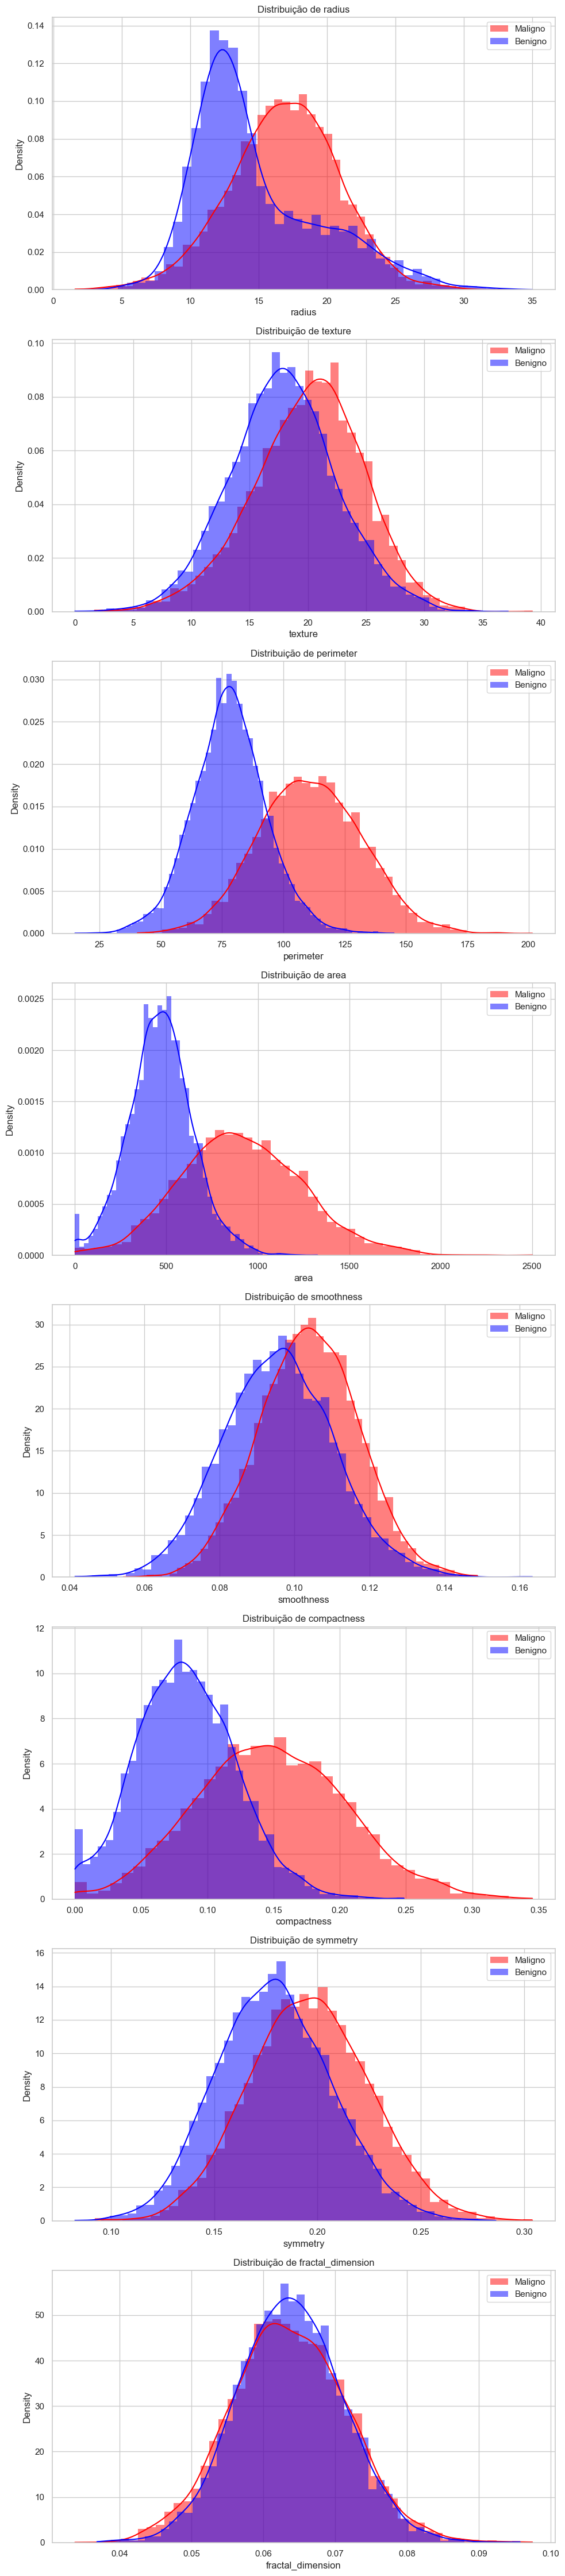

In [63]:
cancer_maligno = cancer[cancer.diagnosis_result ==  'M']
cancer_benigno = cancer[cancer.diagnosis_result ==  'B']

sns.set(style='whitegrid')

parametros_selecinados = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness','symmetry', 'fractal_dimension'
       ]

fig, axes = plt.subplots(len(parametros_selecinados), 1, figsize = (10,45))

for i, parametros in enumerate(parametros_selecinados):
    sns.histplot(cancer_maligno[parametros], color = 'red', label = 'Maligno', ax = axes[i], kde = True, stat = 'density', linewidth = 0)
    sns.histplot(cancer_benigno[parametros], color = 'blue', label = 'Benigno', ax = axes[i], kde = True, stat = 'density', linewidth = 0)
    axes[i].set_title(f'Distribuição de {parametros}')
    axes[i].legend()

plt.tight_layout()
plt.show()

O histograma acima compara a distribuição das variáveis morfológicas de células tumorais benignas e malignas.<br>
As áreas vermelhas representam a distribuição das medidas morfológicas de células malignas, enquanto que as áreas azuis representam a distribuição das medidas morfológicas de células benignas.<br>
As características morfologicas como o raio tendem a apresentar medidas mais elevadas em células malignas, quando comparadas com células tumorais benignas. No entando há grande sobreposição entre as categorias quando observada sua distribuição. Os parâmetros que apresentam este comportamento podem ser úteis para diferenciar os dois tipos de diagnósticos. <br>
Já asa características morfológicas dadas por suavidade, simetria, dimenção fractal e textura apresentam grande sobreposição das curvas maligna e benigna, indicando que os valores entre os dois tipos de tumor são muito semelhantes, dificultando a diferenciação entre os tipos de tumor com base nestes parâmetro. <br>
Por fim, variáveis como perímetro, área e compacidade apresentam uma clara separação mais evidente entre as distribuições. Como observado no histograma, as curvas são mais afastadas, sugerindo que essas caracteristicas são melhores discriminadas entre maligno e benigno. 

Como evidenciado pelos resultados acima, a abordade de clusterização pode não ser a melhor abordagem.<br>
Desta forma, a ideia é tentar outras abordagens.

# 7. Abordagem de modelos supervisionados.

## 7.1. Arvores de decisão

In [64]:
cancer = cancer_dataframe.copy()

In [65]:
#  1. Codificando as variáveis categóricas
codificacao = OneHotEncoder(sparse_output=False)
variaveis_categoricas = ['tissue', 'diagnosis_result']

# Salvando a variável 'diagnosis_result' antes da codificação
y = cancer['diagnosis_result']

# Aplicando o One-Hot Encoding
variaveis_codificadas = codificacao.fit_transform(cancer[variaveis_categoricas])

# Convertendo para DF  e unido aos dados originais
df_codificado = pd.DataFrame(variaveis_codificadas, columns = codificacao.get_feature_names_out(variaveis_categoricas))
cancer = pd.concat([cancer.drop(columns=variaveis_categoricas), df_codificado], axis=1)

In [66]:
# 2. removendo as colunas codificadas
remover_colunas = [col for col in cancer.columns if 'diagnosis_result' in col]

# 3. Dividindo os dados entre treino e teste
X = cancer.drop(columns=remover_colunas)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = parametro_random_state)

In [67]:
# 4. Treinando a arvore de decisão
arvore = DecisionTreeClassifier(random_state=parametro_random_state)
arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [68]:
# Avaliando o modelo usando o conjunto de teste
y_pred = arvore.predict(X_test)


# Avaliando a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia:{acuracia: .2f}')


# Matriz de confusão e relatório de classificação
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.90
[[1477  167]
 [ 158 1389]]
              precision    recall  f1-score   support

           B       0.90      0.90      0.90      1644
           M       0.89      0.90      0.90      1547

    accuracy                           0.90      3191
   macro avg       0.90      0.90      0.90      3191
weighted avg       0.90      0.90      0.90      3191



Os resultados evidenciados acima indicam:<br>
1. Acurácia = 0.9 -> 90% das previsões feitas pelo modelo estão corretas, o que indica um bom desempenho geral. <br><br>
2. Sobre a matriz de confusão:<br>
1477 amostras Benignas foram corretamente classificadas.<br>
167 amostras benignas foram classificadas incorretamente.<br>
158 amostras malignas foram classificadas incorretamente.<br>
1389 amostras malignas foram corretamente classificadas.<br><br>
3. Relatório de Classificação <br><br>
    Classe benigno:<br>
        precisão 0.9 -> 90% das amostras que o modelo previu como benignas foram classificadas corretamente.<br>
        Recall 0.9 -> 90% das amostras que realmente eram benignas foram corretamente identificadas pelo modelo, indicando que o modelo é eficaz em detectar amostras benignas. <br>
        F1-score 0.9 -> combinação de precisão e recall. o resultado obtido sugere que o modelo está balanceado em termos de precisão e capacidade de detecção da classe Benigno.<br><br>
    Classe maligno: <br>
        Precisão 0.89 -> O modelo foi capaz de prever corretamente 89% das amostras.<br>
        Recall 0.9 -> 90% das amostras foram identificadas corretametne pelo modelo.<br>
        F1-score 0.9 -> O resultado obtido sugere que o modelo está balanceado em termos de precisão e capacidade de detecção da classe Maligna.<br><br>
    Médias:<br>
        Macro avg 0.9 -> A média simples das metricas precisão, recall e F1-score para as duas classes. Como o conjunto de dados está balanceado, os valores são iguais.<br>
        Weighted avg 0.9 -> A média ponderada de precisão, recall e F1-score, levando em consideração o número de amostras em cadas classe. Neste caso, as classes estão relativamente balanceadas, então a média ponderada reflete bem o desempenho geral do modelo.

In [69]:
# 5. Otimização da árvore de decisão (Ajuste de hiperparâmetros)

# Grade de hiperparâmetros
grade_hiperparametros = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[4,6,8,10],
    'min_samples_split':[2,10,20],
    'min_samples_leaf':[5,10,15],
    'max_features':['auto','sqrt','log2']
}

# Configurando o gridsearch
hiperparametros = GridSearchCV(DecisionTreeClassifier(random_state = parametro_random_state), grade_hiperparametros, cv = 5)

# Treinando o modelo
hiperparametros.fit(X_train, y_train)

# Melhores combinações de hiperparâmetros
print("Melhores hiperparâmetros:",  hiperparametros.best_params_)

# Reavaliando o modelo
y_pred = arvore.predict(X_test)

# Avaliando a acurácia do modelo
acuracia_ajustada = accuracy_score(y_test, y_pred)
print(f'Acurácia com ajuste:{acuracia_ajustada: .2f}')

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}
Acurácia com ajuste: 0.90


c:\Users\Eduardo Socca\OneDrive\Cursos online\MBA Data Science e Analytics - USP Esalq\TCC\tcc_breast_cancer\venv_tcc\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Eduardo Socca\OneDrive\Cursos online\MBA Data Science e Analytics - USP Esalq\TCC\tcc_breast_cancer\venv_tcc\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Eduardo Socca\OneDrive\Cursos online\MBA Data Science e Analytics - USP Esalq\TCC\tcc_breast_cancer\ve

<h3>Melhores hiperparâmetros: </h3>
'criterion': 'entropy', <br>
'max_depth': 10, <br>
'max_features': 'sqrt',<br>
'min_samples_leaf': 5,<br>
'min_samples_split': 2<br>
<h3>Acurácia com ajuste: 0.91</h3>

In [70]:
# Setando os hiperparâmetretros conforme avaliado
arvore = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=2,
    criterion='entropy',
    max_features='sqrt',
    random_state=parametro_random_state
)

arvore.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, random_state=42)

In [71]:
# Reavaliando o modelo

y_pred = arvore.predict(X_test)
print(f'Acurácia ajustada:{accuracy_score(y_test, y_pred):.2f}')

Acurácia ajustada:0.91


### Visualizando a Arvore

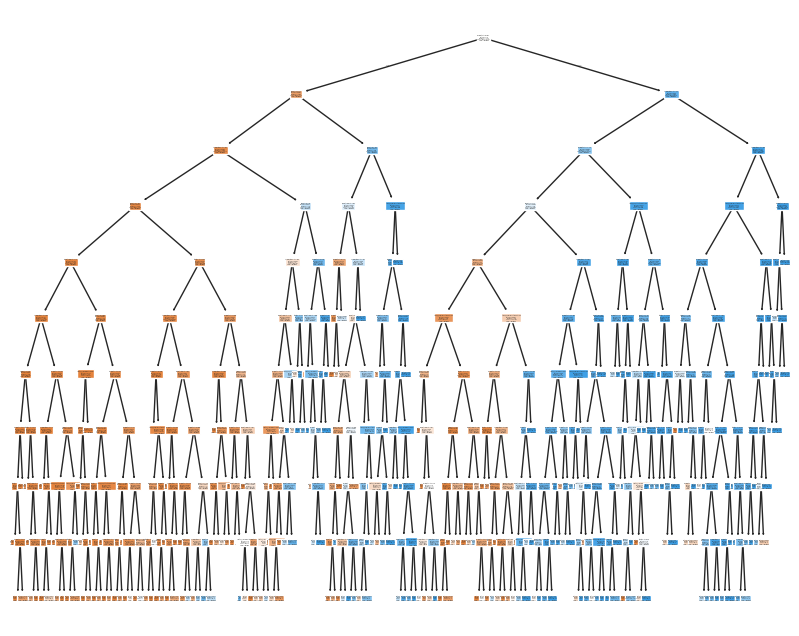

In [72]:
plt.figure(figsize=(10,8))
plot_tree(arvore, filled=True, feature_names=X.columns, class_names=['Benigno', 'Maligno'])
plt.show()

# Documentação

In [73]:
with open('documentacao.txt', 'w', encoding = 'utf-8') as doc:
    doc.write("1. Instalação das Bibliotecas. \n")
    doc.write("Nesta etapa se encontram todas as bibliotecas instaladas no ambiente virtual para execução do projeto. \n")